# Chap 11. Convolutional Neural Network

## 1. Architecture
- 아래 그림은 Convolutaional neural network 의 동작 매커니즘 전체를 나타낸 것이다.

- Hidden layers가 아래 그림과 동일한 network으로 구성될 필요는 없다. 일반적인 예인다.

<img src="https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png" alt="" title="" />

### 1.1. Convolution + ReLU Layer 

- 처음 자동차 이미지 벡터가 32x32x3(RGB color) 이라면, Convolution은 일정 크기로 잘라서 필터(혹은 커널이라 부른다) 처리를 한다.

- 예를들어 5x5x3 filter로 정의하여 한개의 값을 생성한다. one number = Wx + b

- 한개의 값은 다시 ReLU activation layer에서 처리를 하게된다. one number = ReLU(Wx + b)

- 위에서 정의한 동일한 필터를 아래 그림과 같이 전체 이미지벡터에 대해 stride의 크기 만큼 이동 시키면서 one number를 생성해 나가게 된다.

<img src="https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif" alt="" title="" />

- N x N의 이미지 벡터가 있고, 이때 F x F 필터를 정의 했다면 one number의 output size는 아래와 같이 될것이다. output size는 반드시 자연수가 되도록 정의 해야한다.

\begin{equation*}
Output size = \frac{(N - F)}{Stride} + 1
\end{equation*}

- 그런데 위 과정을 거치게 되면 원본 이미지에 대한 정보를 점점 잃어버리는 현상이 발생한다. 이에 따라 원본 이미지를 잃어버리지 않게 하기 위해 zero padding을 시켜주게 된다. 또한 zero padding은 원본 이미지 벡터의 모서리에 대한 정보도 알수있게 해준다.
  - 예를 들어 7x7 원본 이미지에, 3x3 필터, stride가 1, zero padding을 1 만큼 했다면
  - N은 7x7에서 zero padding에 따라 9x9가 되며 output size는 아래와 같이 7이 되어 7x7의 출력이 나온다.
  - 결국 하기 그림과 같이 원본 이미지의 크기 7x7과 동일한 7x7의 결과를 얻게되어 원본 이미지의 정보를 잃지 않게 된다.
  
  - zero padding을 하게되면 결론적으로 stride로 나눈만큼의 출력 shape을 얻게된다. 

\begin{equation*}
Output size = \frac{(N - F)}{Stride}+1 = \frac{(9 - 3)}{1} + 1 = \frac{6}{2} + 1 = 7
\end{equation*}

<img src="https://cdn-images-1.medium.com/max/800/0*iqNdZWyNeCr5tCkc." alt="" title="" />

- 위 까지의 설명은 1개의 필터를 통해서 one feature를 얻었는데, 필터를 여러개를 사용하게 되면 아래 그림과 같이 all feature maps 얻을수 있으며 depth는 필터의 수와 같다.

<img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/3097f525bea665618d2bdf1f11f5971d67d5490a.png" alt="" title="" />

- 이런 all feature maps를 여러개를 생성할수 있는데 convolution layer에서는 이런 과정을 수행한다.


### 1.2. Pooling layer
- Pooling layer는 아래 그림과 같이 Convolution layer에서 feature map 한개씩 pooling(또는 sampling)을 하여 resizing을 하여 다시 모으는 역할을 한다.

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0e39e519471cc41b232381bd529542e2c02f21fa/1-Figure1-1.png" alt="" title="" />

- 아래 그림은 Max pooling의 동작 원리를 보여주고 있는데 filter를 2x2, stride를 2로 설정 했다면 filter 영역 내에서 가장 큰 값을 찾아 2x2 크기로 출력하게된다.

<img src="https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png" alt="" title="" />

- Max pooing을 가장 많이 사용하지만 그밖에 평균값 또는 최소값 등을 pooling layer에 사용할수 있다.


### 1.3. Fully connected layer
- Hidden layer의 최종 출력이 Fully connected layer의 입력 X가 된다.
- Fully connected layer는 그동안에 다루었던 Hypothesis, Cost, Minimize를 통해 학습 과정을 실행하게된다.


## 2. Convolutional neural network case study

### 2.1. LeNet-5 (LeCun et al., 1998)
- Architecture : CONV1 - POOL1 - CONV2 - POOL2 - FC
- CONV Filter : 5x5, Stride: 1
- POOL Filter : 2x2, Stride: 2

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/lenet-5-825x285.png?x31195" alt="" title="" />


### 2.2. AlexNet (Krizhevsky et al. 2012)
- Architecture : CONV1 - MAXPOOL1 - NORM1 - CONV2 - MAXPOOL2 - NORM2 - CONV3 - CONV4 - CONV5 - MAXPOOL3 - FC6 - FC7 - FC8 (with 7 CNN ensemble)
- CONV Filter : 11x11x3 Stride: 4
- POOL Filter : 3x3, Stride: 2

<img src="https://www.researchgate.net/publication/314283258/figure/fig1/AS:469483564343296@1488945012114/AlexNet-convolutional-neural-network-25.ppm" alt="" title="" />


### 2.3. GoogLeNet (Szegedy et al., 2014)

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131838/temp9.png" alt="" title="" />


### 2.4. ResNet (He et al., 2015)
- Layer depth : 152 layers

<img src="https://qph.fs.quoracdn.net/main-qimg-681b59a575398a29837549ba8d89d381" alt="" title="" />


### 2.5. CNN for Sentence Classification (Yoon Kim, 2014)

<img src="https://user-images.githubusercontent.com/7529838/34460821-5e3542f4-ee5d-11e7-93d4-f8ce81984b89.png" alt="" title="" />

 
### 2.6. AlphaGo (2017)
- Input image size = 19x19x48
- CONV1 : 192 Filter 5x5 , stride 1, pad 2 = 19x19x192
- CONV2~CONV12 : 192 Filter 3x3, stride 1, padd 1 = 19x19x192
- CONV : 1 Filter 1x1, stride 1, pad 0 = 19x19

<img src="https://cdn.thenewstack.io/media/2016/01/alphago-2.png" alt="" title="" />


## 3. Lab for Improve Performance

### 3.1. Lab1: Simple Convolution layer

#### 3.1.1. Make an image 3 x 3 x 1(1byte, 256 gray)

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


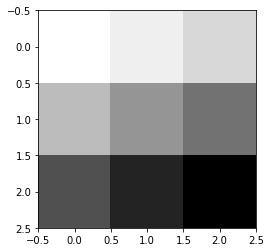

In [5]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

# Visualization
plt.imshow(image.reshape(3,3), cmap='Greys')
#sess.close()

- image shape (1,3,3,1) 에서 앞의 1은 n개 즉 1개의 이미지를 의미한다.
- 상단 백색부터 이미지 백터 1,2,3,... 의 값을 시각화 한것이다.

#### 3.1.2. Convolution layer without zero padding

- output size = ((N-F)/stride)+1 = ((3-2)/1)+1 = 2가 되어 2x2의 출력이 만들어 진다.

- logits은 WX+b의 형태를 가진다. 필터의 weight이 모두 1이고, stride가 1이므로 1+2+4+5 = 12, 2+3+5+6=16, 4+5+7+8=24, 5+6+8+9=28 순으로 출력이 만들어 진다.

- Convolution layer는 tf.nn.conv2d 함수하나로 모두 처리된다.

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


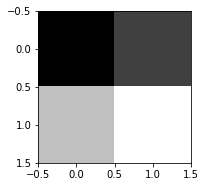

In [3]:
print("image.shape:", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

# Visualization
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

#### 3.1.3. Convolution layer with zero padding

- conv2d 함수에서 padding 을 'SAME'으로 설정할 경우 원본 이미지와 같이 크기의 출력을 만들도록 zero padding 처리를 해준다.

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


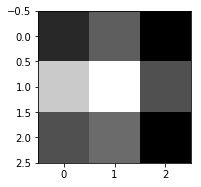

In [3]:
print("image.shape:", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

# Visuzlization
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i + 1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

#### 3.1.4. Three filters (2x2x1x3)
- 3가지 필터를 사용하고 싶을 경우, 필터의 weight만 변경해주면 된다.

- output size는 padding이 SAME이고 stride가 1이므로 원본 이미지와 동일한 3x3의 출력이 만들어진다.

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 3)
conv2d_img.shape: (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


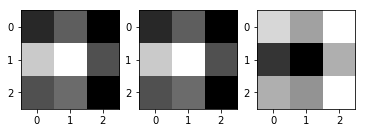

In [4]:
print("image.shape:", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

# Visualization
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

#### 3.1.5. Max Pooling
- Pooling layer는 convolution layer의 출력을 받아 resizing을 하는 과정이다.

- tf.nn.max_pool 함수를 사용하여 처리 한다. 커널사이즈를 만큼 stride 시키며 최대값을 찾아  resizing을 실현한다.

- 아래 소스에서는 2x2 이미지를 커널 사이즈 2x2, stride 1, zero padding을 SAME으로 처리하였기 때문에 원본 이미지와 같은 출력이 나오게된다.

In [7]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print("image.shape = ", image.shape)
print("pool.shape = ", pool.shape)
print("pool.eval = \n", pool.eval())

sess.close()

image.shape =  (1, 2, 2, 1)
pool.shape =  (1, 2, 2, 1)
pool.eval = 
 [[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


#### 3.1.5. MNIST image loading

- MNIST 첫번째 데이터를 불러와서 출력을 해보면 아래와 같다.

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz


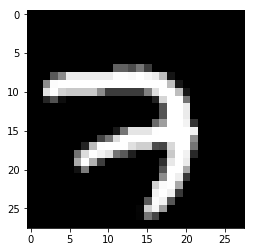

In [3]:
from tensorflow.examples.tutorials.mnist import input_data                      
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Display image
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

#### 3.1.6. MNIST Convolution layer with 5 filters
- 위 이미지를 3x3x1x5 필터를 통해 convolution layer를 만들어 이를 시각화하면 아래와 같다.

- 3x3은 필터 사이즈, 1은 256 gray color, 5는 필터의 종류를 의미한다.

- stride 는 2x2로 하였고, padding 은 SAME으로 원본 이미지와 크기를 같게 하였으므로 출력의 shape은 14x14가 된다.

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


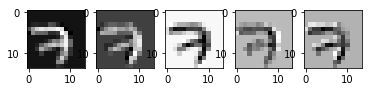

In [4]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

#### 3.1.7. MNIST Max pooling
- 커널 사이즈를 2x2, stride를 2x2,로 padding은 SAME으로 하였으므로 resizing 되었다.

- Convolution layer의 shape이 14x14였으나, stride가 2기 때문에 출력의 shpae은 7x7이 된다.

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


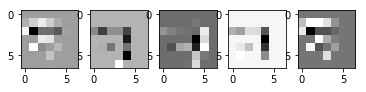

In [5]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

### 3.2. Lab2: CNN basic for MNIST (Accuracy : 0.9877)
- NN : Input layer - CONV1 - POOL1 - CONV2 - POOL2 - FC - Output layer

In [2]:
################################################################################
# lab11-2 : minist by convolution nerual network
#           accuracy : 0.9877
################################################################################
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Parameters
learning_rate = 0.001 # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
nb_classes = 10 # 0 ~ 9 digits recognition = 10 classed

# Input placeholders 
X = tf.placeholder(tf.float32, shape=[None, 784]) # imgage = 28x28 = 784 pixel
X_img = tf.reshape(X, [-1, 28, 28, 1]) # all images x 28x28 x 1(256 gray)
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# L1 image input shape -> (?, 28, 28, 1)
# Filter1 shape design -> (3x3 x 1(256gray) x 32EA filters)
# Convolution shape    -> (?, 28, 28, 32) because padding set to 'SAME'
# Poolig shape         -> (?, 14, 14, 32) because pooling kernel size set to 2x2
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')

# L2 image input shape -> (?, 14, 14, 32)
# Filter2 shape design -> (3x3 x 32(32channel) x 64EA filters)
# Convolution shape    -> (?, 14, 14, 64) because padding set to 'SAME'
# Poolig shape         -> (?, 7, 7, 64) because pooling kernel size set to 7x7
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64]) # for fully connected layer!!

# Final FC 7x7x64 inputs to 10(nb_classes)
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, nb_classes],
        initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L2_flat, W3) + b

# Define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train model
print("Learning started. It takes sometime...")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}]\tCost: {:>.9}".format(epoch + 1, avg_cost))

print("Learning finished!!")

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("\nAccuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images,
    Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nTest one label and prediction...")
print("Label:     \t", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:\t", sess.run(tf.argmax(logits, 1), feed_dict={
    X: mnist.test.images[r:r + 1]}))

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime...
[Epoch:    1]	Cost: 0.379597128
[Epoch:    2]	Cost: 0.101766317
[Epoch:    3]	Cost: 0.0761249596
[Epoch:    4]	Cost: 0.062085432
[Epoch:    5]	Cost: 0.0518382422
[Epoch:    6]	Cost: 0.044835228
[Epoch:    7]	Cost: 0.0414421321
[Epoch:    8]	Cost: 0.0364384824
[Epoch:    9]	Cost: 0.0314655367
[Epoch:   10]	Cost: 0.0288160969
[Epoch:   11]	Cost: 0.0244606332
[Epoch:   12]	Cost: 0.0233854826
[Epoch:   13]	Cost: 0.020476038
[Epoch:   14]	Cost: 0.0180840186
[Epoch:   15]	Cost: 0.0162545285
Learning finished!!

Accuracy: 0.987

Test one label and prediction...
Label:     	 [1]
Prediction:	 [1]


### 3.3. Lab3: CNN deep for MNIST (Accuracy: 0.9931)
- NN : Input layer - CONV1 - POOL1 - CONV2 - POOL2 - CONV3 - POOL3 - FC1 - FC2 - Output layer
- CONV1 부터 FC1 까지는 Dropout을 적용함.

In [2]:
################################################################################
# lab11-3 : minist by deep learning convolution nerual network
#           accuracy : 0.9931
################################################################################
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Parameters
learning_rate = 0.001 # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
nb_classes = 10 # 0 ~ 9 digits recognition = 10 classed
keep_prob = tf.placeholder(tf.float32)

# Input placeholders 
X = tf.placeholder(tf.float32, shape=[None, 784]) # imgage = 28x28 = 784 pixel
X_img = tf.reshape(X, [-1, 28, 28, 1]) # all images x 28x28 x 1(256 gray)
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# L1 image input shape -> (?, 28, 28, 1)
# Filter1 shape design -> (3x3 x 1(256gray) x 32EA filters)
# Convolution shape    -> (?, 28, 28, 32) because padding set to 'SAME'
# Poolig shape         -> (?, 14, 14, 32) because pooling kernel size set to 2x2
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 image input shape -> (?, 14, 14, 32)
# Filter2 shape design -> (3x3 x 32(channel) x 64EA filters)
# Convolution shape    -> (?, 14, 14, 64) because padding set to 'SAME'
# Poolig shape         -> (?, 7, 7, 64) because pooling kernel size set to 7x7
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    
# L3 image input shape -> (?, 7, 7, 64)
# Filter2 shape design -> (3x3 x 64(channel) x 128EA filters)
# Convolution shape    -> (?, 7, 7, 128) because padding set to 'SAME'
# Poolig shape         -> (?, 4, 4, 128) because pooling kernel size set to 4x4
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 128]) # for fully connected layer!!

# FC 1st 4x4x128 inputs to 625 outputs
W4 = tf.get_variable("W4", shape=[4 * 4 * 128, 625],
        initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# FC 2nd 625 inputs to 10(nb_classes)   
W5 = tf.get_variable("W5", shape=[625, nb_classes],
        initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L4, W5) + b5

# Define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train model
print("Learning started. It takes sometime...")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}]\tCost: {:>.9}".format(epoch + 1, avg_cost))

print("Learning finished!!")

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("\nAccuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images,
    Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nTest one label and prediction...")
print("Label:     \t", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:\t", sess.run(tf.argmax(logits, 1), feed_dict={
    X: mnist.test.images[r:r + 1], keep_prob: 1}))

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime...
[Epoch:    1]	Cost: 0.416150304
[Epoch:    2]	Cost: 0.0926853217
[Epoch:    3]	Cost: 0.0682261674
[Epoch:    4]	Cost: 0.0537698725
[Epoch:    5]	Cost: 0.0506835632
[Epoch:    6]	Cost: 0.0441732411
[Epoch:    7]	Cost: 0.040319178
[Epoch:    8]	Cost: 0.0370661633
[Epoch:    9]	Cost: 0.0338365095
[Epoch:   10]	Cost: 0.0351766979
[Epoch:   11]	Cost: 0.0298522976
[Epoch:   12]	Cost: 0.027705881
[Epoch:   13]	Cost: 0.02742508
[Epoch:   14]	Cost: 0.0257915536
[Epoch:   15]	Cost: 0.0252825001
Learning finished!!

Accuracy: 0.9937

Test one label and prediction...
Label:     	 [3]
Prediction:	 [3]


### 3.4. Lab4: CNN deep for MNIST class version (Accuracy: 0.9931)
- Lab2와 동일하나 python class 로 refactorying 하였다.

In [2]:
################################################################################
# lab11-4 : minist by deep learning convolution nerual network class version
#           accuracy : 0.9931
################################################################################
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Parameters
learning_rate = 0.001 # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
nb_classes = 10 # 0 ~ 9 digits recognition = 10 classed

# Model class
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate 0.7~0.5 on training,
            # build should be 1 for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # Input placeholders 
            self.X = tf.placeholder(tf.float32, shape=[None, 784]) # imgage = 28x28 = 784 pixel
            X_img = tf.reshape(self.X, [-1, 28, 28, 1]) # all images x 28x28 x 1(256 gray)
            self.Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

            # L1 image input shape -> (?, 28, 28, 1)
            # Filter1 shape design -> (3x3 x 1(256gray) x 32EA filters)
            # Convolution shape    -> (?, 28, 28, 32) because padding set to 'SAME'
            # Poolig shape         -> (?, 14, 14, 32) because pooling kernel size set to 2x2
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
                    padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            # L2 image input shape -> (?, 14, 14, 32)
            # Filter2 shape design -> (3x3 x 32(channel) x 64EA filters)
            # Convolution shape    -> (?, 14, 14, 64) because padding set to 'SAME'
            # Poolig shape         -> (?, 7, 7, 64) because pooling kernel size set to 7x7
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
                    padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

    
            # L3 image input shape -> (?, 7, 7, 64)
            # Filter2 shape design -> (3x3 x 64(channel) x 128EA filters)
            # Convolution shape    -> (?, 7, 7, 128) because padding set to 'SAME'
            # Poolig shape         -> (?, 4, 4, 128) because pooling kernel size set to 4x4
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1 ,2, 2, 1], strides=[1, 2, 2, 1],
                    padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)
            L3_flat = tf.reshape(L3, [-1, 4 * 4 * 128]) # for fully connected layer!!

            # FC 1st 4x4x128 inputs to 625 outputs
            W4 = tf.get_variable("W4", shape=[4 * 4 * 128, 625],
                    initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            # FC 2nd 625 inputs to 10(nb_classes)   
            W5 = tf.get_variable("W5", shape=[625, nb_classes],
                    initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([nb_classes]))
            self.logits = tf.matmul(L4, W5) + b5

        # Define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                        logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
                            learning_rate=learning_rate).minimize(self.cost)

        # Accuracy
        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(
                                self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test,
                self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test,
                self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
                self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

    def prediction_self_test(self, keep_prop=1.0):
        # Get one and predict
        r = random.randint(0, mnist.test.num_examples - 1)
        print("\nTest one label and prediction...")
        print("Label:     \t",
            self.sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction:\t",
            self.sess.run(tf.argmax(self.logits, 1),
            feed_dict={self.X: mnist.test.images[r:r + 1],
               self.keep_prob: keep_prop}))
    

# Initialize
sess = tf.Session()
m1 = Model(sess, "m1")
sess.run(tf.global_variables_initializer())

# Train model
print("Learning started. It takes sometime...")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}]\tCost: {:>.9}".format(epoch + 1, avg_cost))

print("Learning finished!!")

# Test model and check accuracy
print("\nAccuracy:", m1.get_accuracy(mnist.test.images, mnist.test.labels))

# Get one and predict
m1.prediction_self_test()

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime...
[Epoch:    1]	Cost: 0.416150304
[Epoch:    2]	Cost: 0.0926853217
[Epoch:    3]	Cost: 0.0682261674
[Epoch:    4]	Cost: 0.0537698725
[Epoch:    5]	Cost: 0.0506835632
[Epoch:    6]	Cost: 0.0441732411
[Epoch:    7]	Cost: 0.040319178
[Epoch:    8]	Cost: 0.0370661633
[Epoch:    9]	Cost: 0.0338365095
[Epoch:   10]	Cost: 0.0351766979
[Epoch:   11]	Cost: 0.0298522976
[Epoch:   12]	Cost: 0.027705881
[Epoch:   13]	Cost: 0.02742508
[Epoch:   14]	Cost: 0.0257915536
[Epoch:   15]	Cost: 0.0252825001
Learning finished!!

Accuracy: 0.9937

Test one label and prediction...
Label:     	 [1]
Prediction:	 [1]


### 3.5. Lab5: CNN deep for MNIST tf layer version (Accuracy: 0.9939)
- Lab3와 동일하나 tensorflow high level API를 적용하여 가독성을 높였다.

In [2]:
################################################################################
# lab11-5 : minist by deep learning convolution nerual network with tf.layer
#           accuracy : 0.9939
################################################################################
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Parameters
learning_rate = 0.001 # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
nb_classes = 10 # 0 ~ 9 digits recognition = 10 classed

# Model class
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate 0.7~0.5 on training,
            # build should be 1 for testing
            self.training = tf.placeholder(tf.bool)

            # Input placeholders 
            self.X = tf.placeholder(tf.float32, shape=[None, 784]) # imgage = 28x28 = 784 pixel
            X_img = tf.reshape(self.X, [-1, 28, 28, 1]) # all images x 28x28 x 1(256 gray)
            self.Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

            # Convolutional layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, 
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, 
                    training=self.training)

            # Convolutional layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, 
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #2
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, 
                    training=self.training)

            # Convolutional layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128,
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #3
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, 
                    training=self.training)

            # Dense layer with RELU
            flat = tf.reshape(dropout3, [-1, 4 * 4* 128])
            dense4 = tf.layers.dense(inputs=flat, units=625,
                    activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(dense4, rate=0.5,
                    training=self.training)

            # Logits (no activation) layer : L5 final FC 625 inputs to 10(nb_classes)
            self.logits = tf.layers.dense(inputs=dropout4, units=nb_classes)

        # Define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                        logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
                        learning_rate=learning_rate).minimize(self.cost)

        # Accuracy
        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(
                                self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test,
                self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test,
                self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
                self.X: x_data, self.Y: y_data, self.training: training})

    def prediction_self_test(self, training=False):
        # Get one and predict
        r = random.randint(0, mnist.test.num_examples - 1)
        print("\nTest one label and prediction...")
        print("Label:     \t",
            self.sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction:\t",
            self.sess.run(tf.argmax(self.logits, 1),
            feed_dict={self.X: mnist.test.images[r:r + 1],
               self.training: training}))
    

# Initialize
sess = tf.Session()
m1 = Model(sess, "m1")
sess.run(tf.global_variables_initializer())

# Train model
print("Learning started. It takes sometime...")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}]\tCost: {:>.9}".format(epoch + 1, avg_cost))

print("Learning finished!!")

# Test model and check accuracy
print("\nAccuracy:", m1.get_accuracy(mnist.test.images, mnist.test.labels))

# Get one and predict
m1.prediction_self_test()

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime...
[Epoch:    1]	Cost: 0.289628289
[Epoch:    2]	Cost: 0.085612601
[Epoch:    3]	Cost: 0.066528947
[Epoch:    4]	Cost: 0.0535344537
[Epoch:    5]	Cost: 0.0495403229
[Epoch:    6]	Cost: 0.0437016882
[Epoch:    7]	Cost: 0.0395926459
[Epoch:    8]	Cost: 0.038719447
[Epoch:    9]	Cost: 0.0330028621
[Epoch:   10]	Cost: 0.034108294
[Epoch:   11]	Cost: 0.0311745752
[Epoch:   12]	Cost: 0.0303084652
[Epoch:   13]	Cost: 0.0281676022
[Epoch:   14]	Cost: 0.027779782
[Epoch:   15]	Cost: 0.0262370907
Learning finished!!

Accuracy: 0.9938

Test one label and prediction...
Label:     	 [0]
Prediction:	 [0]


### 3.6. Lab6: CNN ensemble for MNIST (Accuracy: 0.9946)
- Lab4와 동일하나 ensemble을 적용하였다.
- 독립된 3개의 모델을 학습시킨 후 각 prediction을 모두 더한후 가장 높은 값으로 분류한다.

In [2]:
################################################################################
# lab11-6 : minist by convolution nerual network with ensemble layers
#           accuracy : 0.9946
################################################################################
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Parameters
learning_rate = 0.001 # we can use large learning rate using Batch Normalization
training_epochs = 20
batch_size = 100
nb_classes = 10 # 0 ~ 9 digits recognition = 10 classed

# Model class
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate 0.7~0.5 on training,
            # build should be 1 for testing
            self.training = tf.placeholder(tf.bool)

            # Input placeholders 
            self.X = tf.placeholder(tf.float32, shape=[None, 784]) # imgage = 28x28 = 784 pixel
            X_img = tf.reshape(self.X, [-1, 28, 28, 1]) # all images x 28x28 x 1(256 gray)
            self.Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

            # Convolutional layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, 
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, 
                    training=self.training)

            # Convolutional layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, 
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #2
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, 
                    training=self.training)

            # Convolutional layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128,
                    kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            
            # Pooling layer #3
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                    padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, 
                    training=self.training)

            # Dense layer with RELU
            flat = tf.reshape(dropout3, [-1, 4 * 4* 128])
            dense4 = tf.layers.dense(inputs=flat, units=625,
                    activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(dense4, rate=0.5,
                    training=self.training)

            # Logits (no activation) layer : L5 final FC 625 inputs to 10(nb_classes)
            self.logits = tf.layers.dense(inputs=dropout4, units=nb_classes)

        # Define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                        logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
                        learning_rate=learning_rate).minimize(self.cost)

        # Accuracy
        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(
                                self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test,
                self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test,
                self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
                self.X: x_data, self.Y: y_data, self.training: training})

    def prediction_self_test(self, training=False):
        # Get one and predict
        r = random.randint(0, mnist.test.num_examples - 1)
        print("\nTest one label and prediction...")
        print("Label:     \t",
            self.sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction:\t",
            self.sess.run(tf.argmax(self.logits, 1),
            feed_dict={self.X: mnist.test.images[r:r + 1],
               self.training: training}))
    

# Initialize
sess = tf.Session()

models = []
num_models = 3
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

# Train model
print("Learning started. It takes sometime...")
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print("[Epoch:", "%04d" % (epoch + 1), "\tCost:", avg_cost_list)

print("Learning finished!!")

# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx in enumerate(models):
    print("\nModel index:", m_idx, "\tAccuracy:", m.get_accuracy(
                mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
        tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
        tf.cast(ensemble_correct_prediction, tf.float32))
print("Ensemble accuracy:", sess.run(ensemble_accuracy))

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime...
[Epoch: 0001 	Cost: [0.28962829 0.28869031 0.28473182]
[Epoch: 0002 	Cost: [0.0856126  0.09220979 0.08904249]
[Epoch: 0003 	Cost: [0.06652895 0.06821074 0.06888896]
[Epoch: 0004 	Cost: [0.05353445 0.0574173  0.05881537]
[Epoch: 0005 	Cost: [0.04954032 0.04863594 0.0490442 ]
[Epoch: 0006 	Cost: [0.04370169 0.04839998 0.04546389]
[Epoch: 0007 	Cost: [0.03959265 0.04065218 0.04149157]
[Epoch: 0008 	Cost: [0.03871945 0.03738105 0.03928586]
[Epoch: 0009 	Cost: [0.03300286 0.03560205 0.03581892]
[Epoch: 0010 	Cost: [0.03410829 0.03188517 0.03399692]
[Epoch: 0011 	Cost: [0.03117458 0.03069735 0.03093477]
[Epoch: 0012 	Cost: [0.03030847 0.02916503 0.03105707]
[Epoch: 0013 	Cost: [0.0281676  0.02935034 0.03023285]
[Epoch: 0014 	Cost: [0.02777